# Tarea  3  Algoritmos de Aprendizaje Supervisado 
---
## Estudiante: Gabriel Orlando Cuentas Torres
---
Dataset Regresión Lineal – Vehicle dataset
---
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el "3" modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 
5. Entrenar el modelo configurando los diferentes hiperparámetros. 
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [31]:
# Cargar las librerías necesarias

import pandas as pd # Manejo y análisis de la estructura de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns  # Creación gráficos estadísticos
import matplotlib.pyplot as plt  # Creación de gráficos en dos dimensiones

# Librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.Linear_model import LogisticRegression -> Libreria para Regresión Logistica
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('./Car_details_v3.csv')

In [33]:
# Realizamos lectura de los datos para el analisis exploratorio
Datos.head(50)

,Nombre,Modelo,Precio_venta,km_recorrido,Combustible,Tipo_vendedor,Transmision,Propietario_ant,Kilometraje,Motor,Potencia,Torque,Asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,"Maruti Wagon R LXI DUO BSIII,2007,96000,175000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011.0,350000.0,90000.0,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013.0,200000.0,169000.0,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [34]:
#Descripción de los datos
Datos.describe()

,Modelo,Precio_venta,km_recorrido,Asientos
count,7787.000000,7.787000e+03,7.787000e+03,7566.000000
mean,2014.054193,6.566975e+05,6.840663e+04,5.422284
std,3.911379,8.174188e+05,5.663441e+04,0.955162
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.750000e+05,3.300150e+04,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,5.000000
75%,2017.000000,6.965000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

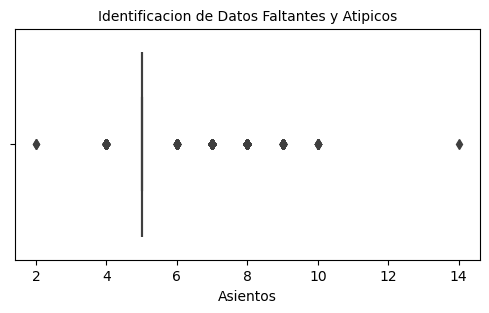

In [78]:
# Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Asientos'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=10)

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [79]:
# Revisión de datos faltantes 
print("Cantidad de Registros con cero en Modelo: ",Datos['Modelo'].isna().sum())
print("Cantidad de Registros con cero en Precio de venta: ",Datos['Precio_venta'].isna().sum())
print("Cantidad de Registros con cero en km recorrido: ",Datos['km_recorrido'].isna().sum())
print("Cantidad de Registros con cero en Asientos: ",Datos['Asientos'].isna().sum())

Cantidad de Registros con cero en Modelo:  0
Cantidad de Registros con cero en Precio de venta:  341
Cantidad de Registros con cero en km recorrido:  341
Cantidad de Registros con cero en Asientos:  562


In [80]:
Datos['Asientos'].isnull().value_counts()

Asientos
False    7566
True      562
Name: count, dtype: int64

In [81]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Modelo']=Datos['Modelo'].replace(0,Datos['Modelo'].mean())
Datos['Precio_venta']=Datos['Precio_venta'].replace(0,Datos['Precio_venta'].mean())
Datos['km_recorrido']=Datos['km_recorrido'].replace(0,Datos['km_recorrido'].mean())
Datos['Asientos']=Datos['Asientos'].replace(0,Datos['Asientos'].mean())

In [82]:
# Revisión nuevamente de datos faltantes 
print("Cantidad de Registros con cero en Modelo: ",Datos['Modelo'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de venta: ",Datos['Precio_venta'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo de : ",Datos['km_recorrido'].isin([0]).sum())
print("Cantidad de Registros con cero en Kilometraje: ",Datos['Kilometraje'].isin([0]).sum())
print("Cantidad de Registros con cero en Potencia: ",Datos['Potencia'].isin([0]).sum())

Cantidad de Registros con cero en Modelo:  0
Cantidad de Registros con cero en Precio de venta:  0
Cantidad de Registros con cero en Tipo de :  0
Cantidad de Registros con cero en Kilometraje:  0
Cantidad de Registros con cero en Potencia:  0


Text(0.5, 1.0, 'Identificacion de Campos atipicos')

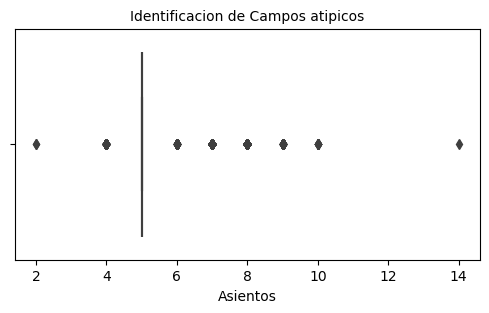

In [83]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Asientos'])
plt.title('Identificacion de Campos atipicos', fontsize=10 )

In [84]:
#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['Asientos']<nivel_minimo)|(Datos['Asientos']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 7566


In [86]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Asientos']<nivel_maximo)&(Datos['Asientos']>nivel_minimo)]

In [87]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Modelo']<nivel_minimo)|(Datos['Modelo']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [88]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nombre           0 non-null      object 
 1   Modelo           0 non-null      float64
 2   Precio_venta     0 non-null      float64
 3   km_recorrido     0 non-null      float64
 4   Combustible      0 non-null      object 
 5   Tipo_vendedor    0 non-null      object 
 6   Transmision      0 non-null      object 
 7   Propietario_ant  0 non-null      object 
 8   Kilometraje      0 non-null      object 
 9   Motor            0 non-null      object 
 10  Potencia         0 non-null      object 
 11  Torque           0 non-null      object 
 12  Asientos         0 non-null      float64
dtypes: float64(4), object(9)
memory usage: 0.0+ bytes


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [46]:
# Total de vehiculos con Gasolina

Datos['Combustible'].value_counts()

Combustible
Diesel    4245
Petrol    3456
CNG         56
LPG         30
Name: count, dtype: int64

In [49]:
Datos[['Combustible']].head(40)

,Combustible
0,Diesel
1,Diesel
2,NaN
3,Diesel
4,NaN
5,Petrol
6,NaN
7,Petrol
8,Diesel
9,Diesel


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [89]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Combustible',axis=1) # Se cargan los datos de train sin los datos de la columna Combustible 
Y = Datos['Combustible'] # Se cargan los datos de train con los datos de la la columna Combustible

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [90]:
print (X_train)

NameError: name 'X_train' is not defined

In [91]:
print (Y_train)

NameError: name 'Y_train' is not defined

## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [92]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

NameError: name 'LogisticRegression' is not defined

In [93]:
print (Y_test)

NameError: name 'Y_test' is not defined

In [94]:
print (Prediccion)

NameError: name 'Prediccion' is not defined

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [95]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

NameError: name 'Y_test' is not defined

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [96]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

NameError: name 'Y_test' is not defined

In [97]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

NameError: name 'Y_test' is not defined

## 8. Interpretar, analizar y documentar los resultados obtenidos